In [56]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
imbalanced_df = pd.read_csv("data/cleaned_dataset/imbalanced_dataset.csv")

In [58]:
imbalanced_df.shape

(20929, 3)

In [59]:
imbalanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20929 entries, 0 to 20928
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review text    20929 non-null  object
 1   overall        20929 non-null  int64 
 2   review_length  20929 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 490.7+ KB


In [60]:
imbalanced_df.head()

,review text,overall,review_length
0,The Delivery from zomato was amazing!!!Deliver...,5,13
1,Delivery guy was rude,4,4
2,Cheaters. They dont deliver what you see in th...,1,32
3,poor. the pic showed broccoli in chicken meal....,4,22
4,ur sandwiches never disappoint me..they taste ...,2,25


In [61]:
imbalanced_df.tail()

,review text,overall,review_length
20924,best kept secret 3rd time staying charm \tnot ...,5,109
20925,great location price view hotel great quick pl...,4,39
20926,ok just looks nice modern outside \tdesk staff...,2,63
20927,hotel theft ruined vacation hotel opened sept ...,1,781
20928,people talking \tca n't believe excellent rati...,2,90


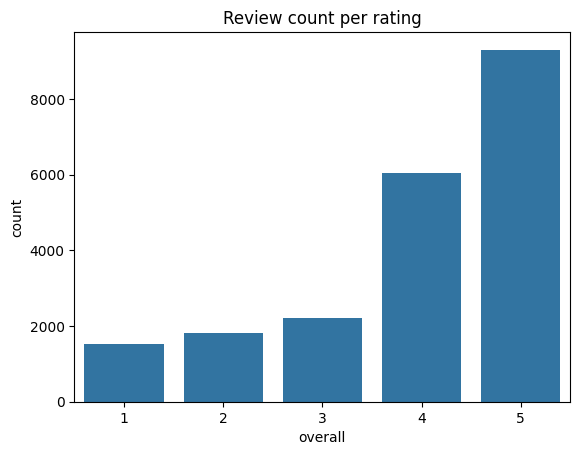

In [62]:
#barplot
sns.countplot(x="overall", data=imbalanced_df)
plt.title("Review count per rating")
plt.show()

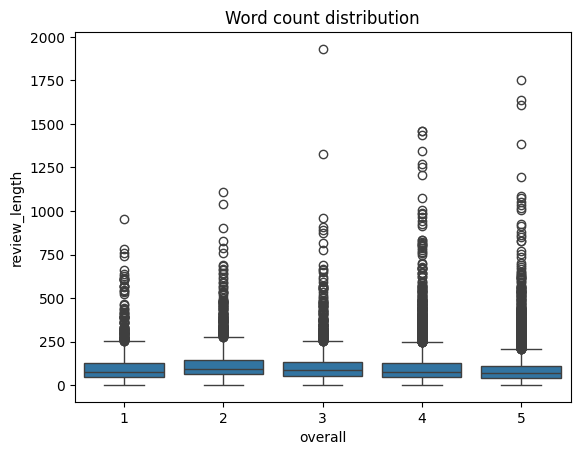

In [63]:
sns.boxplot(x="overall", y="review_length", data=imbalanced_df)
plt.title("Word count distribution")
plt.show()

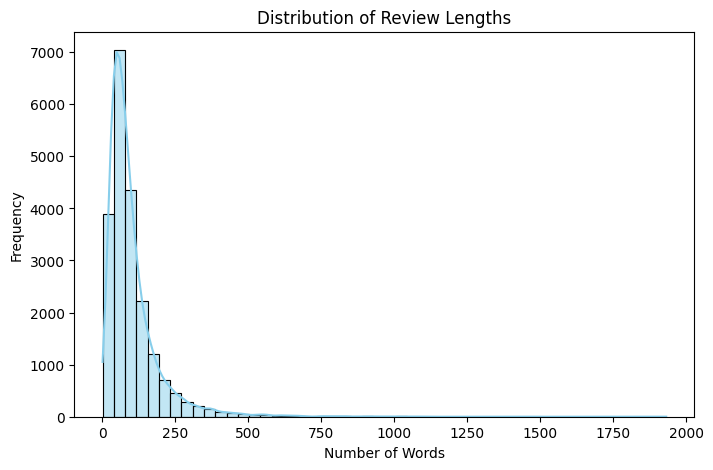

In [64]:
# 2. Review Length Distribution
plt.figure(figsize=(8,5))
sns.histplot(imbalanced_df['review_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [65]:
#cleaning

In [66]:
def clean_text(text):
     text = text.lower()
     text = re.sub(r"http\S+|www\S+", "", text)   
     text = re.sub(r"<.*?>", "", text) 
     text = re.sub(r"[^a-z\s]", " ", text)
     text = re.sub(r"\d+", " ", text)#numbers
     text = text.encode('ascii', 'ignore').decode('utf-8')
     text = re.sub(r"\s+", " ", text).strip()    #extra spaces
     return text

In [67]:
imbalanced_df['reviews']=imbalanced_df['review text'].apply(clean_text)

In [68]:
imbalanced_df.info()
imbalanced_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20929 entries, 0 to 20928
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review text    20929 non-null  object
 1   overall        20929 non-null  int64 
 2   review_length  20929 non-null  int64 
 3   reviews        20929 non-null  object
dtypes: int64(2), object(2)
memory usage: 654.2+ KB


,review text,overall,review_length,reviews
0,The Delivery from zomato was amazing!!!Deliver...,5,13,the delivery from zomato was amazing delivery ...
1,Delivery guy was rude,4,4,delivery guy was rude
2,Cheaters. They dont deliver what you see in th...,1,32,cheaters they dont deliver what you see in the...
3,poor. the pic showed broccoli in chicken meal....,4,22,poor the pic showed broccoli in chicken meal i...
4,ur sandwiches never disappoint me..they taste ...,2,25,ur sandwiches never disappoint me they taste j...


In [69]:
imbalanced_df = imbalanced_df.drop(columns=['review text'])

In [70]:
imbalanced_df.head()

,overall,review_length,reviews
0,5,13,the delivery from zomato was amazing delivery ...
1,4,4,delivery guy was rude
2,1,32,cheaters they dont deliver what you see in the...
3,4,22,poor the pic showed broccoli in chicken meal i...
4,2,25,ur sandwiches never disappoint me they taste j...


In [71]:
#stopwords

In [72]:
#spliting string to words
imbalanced_df['words']=imbalanced_df['reviews'].apply(lambda x: x.split())

In [73]:
imbalanced_df.head()

,overall,review_length,reviews,words
0,5,13,the delivery from zomato was amazing delivery ...,"[the, delivery, from, zomato, was, amazing, de..."
1,4,4,delivery guy was rude,"[delivery, guy, was, rude]"
2,1,32,cheaters they dont deliver what you see in the...,"[cheaters, they, dont, deliver, what, you, see..."
3,4,22,poor the pic showed broccoli in chicken meal i...,"[poor, the, pic, showed, broccoli, in, chicken..."
4,2,25,ur sandwiches never disappoint me they taste j...,"[ur, sandwiches, never, disappoint, me, they, ..."


In [74]:
import nltk
from nltk.corpus import stopwords

In [75]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\hp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\hp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\hp/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [76]:
stop_words = set(stopwords.words('english'))

In [77]:
print("Total Stopwords:", len(stop_words))
print("Stopwords List:", stop_words)

Total Stopwords: 198
Stopwords List: {'s', "we're", 'how', 'myself', 'yourself', 'themselves', 'this', 'ours', 'shan', 'these', 'the', 'because', 'other', 'who', 'further', 'where', 'than', 'have', 're', 'against', 'own', 'during', 'was', 'you', "she'd", 'aren', 'himself', "i'll", "doesn't", 'each', 'hasn', "should've", 'what', 'through', 'no', 'below', 'will', 'with', 'did', 'some', 'all', 'itself', 'their', 'didn', "he'll", 'then', "they'll", "they're", 'from', "don't", 'its', "you'll", "that'll", 've', 'your', 'only', 'wouldn', 'i', 'as', 'nor', 'by', 'were', 'haven', 'had', 'it', "won't", 'y', 'so', 'doing', 'o', "we've", "it'll", 'again', "i've", "you've", 'm', "he'd", 'mustn', 'whom', 'mightn', 'me', "mustn't", "isn't", 'between', "shan't", "wouldn't", 'about', "couldn't", 'can', 'll', 'couldn', 'most', 'been', "it's", 'under', "we'd", 'isn', 'too', 'ain', 'both', "i'd", 'needn', "you'd", 'any', 'an', 'our', 'there', 'he', 'don', "hadn't", 'am', 'just', 'my', 'at', 'that', 'not',

In [78]:
def clean_words_list(words):
    words = [w for w in words if w not in stop_words]
    
    return " ".join(words)

In [79]:
imbalanced_df['reviews'] = imbalanced_df['words'].apply(clean_words_list)

In [80]:
imbalanced_df.head()

,overall,review_length,reviews,words
0,5,13,delivery zomato amazing delivery man also help...,"[the, delivery, from, zomato, was, amazing, de..."
1,4,4,delivery guy rude,"[delivery, guy, was, rude]"
2,1,32,cheaters dont deliver see pic ordered chicken ...,"[cheaters, they, dont, deliver, what, you, see..."
3,4,22,poor pic showed broccoli chicken meal wasnt in...,"[poor, the, pic, showed, broccoli, in, chicken..."
4,2,25,ur sandwiches never disappoint taste superb pl...,"[ur, sandwiches, never, disappoint, me, they, ..."


In [81]:
imbalanced_df.tail()

,overall,review_length,reviews,words
20924,5,109,best kept secret rd time staying charm star ca...,"[best, kept, secret, rd, time, staying, charm,..."
20925,4,39,great location price view hotel great quick pl...,"[great, location, price, view, hotel, great, q..."
20926,2,63,ok looks nice modern outside desk staff n part...,"[ok, just, looks, nice, modern, outside, desk,..."
20927,1,781,hotel theft ruined vacation hotel opened sept ...,"[hotel, theft, ruined, vacation, hotel, opened..."
20928,2,90,people talking ca n believe excellent ratings ...,"[people, talking, ca, n, t, believe, excellent..."


In [82]:
#lematization

In [83]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [84]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\hp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\hp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\hp/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\hp/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [85]:
lemmatizer = WordNetLemmatizer()

In [86]:
def clean_words_list(text):
    from nltk.tokenize import word_tokenize
    words = word_tokenize(str(text))
    lemmatized = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(lemmatized)

In [87]:
imbalanced_df['lemmatized_words'] =imbalanced_df['reviews'].apply(clean_words_list)

In [88]:
imbalanced_df.head()

,overall,review_length,reviews,words,lemmatized_words
0,5,13,delivery zomato amazing delivery man also help...,"[the, delivery, from, zomato, was, amazing, de...",delivery zomato amazing delivery man also help...
1,4,4,delivery guy rude,"[delivery, guy, was, rude]",delivery guy rude
2,1,32,cheaters dont deliver see pic ordered chicken ...,"[cheaters, they, dont, deliver, what, you, see...",cheater dont deliver see pic ordered chicken m...
3,4,22,poor pic showed broccoli chicken meal wasnt in...,"[poor, the, pic, showed, broccoli, in, chicken...",poor pic showed broccoli chicken meal wasnt in...
4,2,25,ur sandwiches never disappoint taste superb pl...,"[ur, sandwiches, never, disappoint, me, they, ...",ur sandwich never disappoint taste superb pls ...


In [89]:
imbalanced_df.tail()

,overall,review_length,reviews,words,lemmatized_words
20924,5,109,best kept secret rd time staying charm star ca...,"[best, kept, secret, rd, time, staying, charm,...",best kept secret rd time staying charm star ca...
20925,4,39,great location price view hotel great quick pl...,"[great, location, price, view, hotel, great, q...",great location price view hotel great quick pl...
20926,2,63,ok looks nice modern outside desk staff n part...,"[ok, just, looks, nice, modern, outside, desk,...",ok look nice modern outside desk staff n parti...
20927,1,781,hotel theft ruined vacation hotel opened sept ...,"[hotel, theft, ruined, vacation, hotel, opened...",hotel theft ruined vacation hotel opened sept ...
20928,2,90,people talking ca n believe excellent ratings ...,"[people, talking, ca, n, t, believe, excellent...",people talking ca n believe excellent rating h...


In [90]:
imbalanced_df['lemmatized_length'] = imbalanced_df['lemmatized_words'].apply(lambda x: len(str(x).split()))
imbalanced_df[ ['review_length','lemmatized_length']].head(10)

,review_length,lemmatized_length
0,13,9
1,4,3
2,32,18
3,22,16
4,25,18
5,11,6
6,31,16
7,9,9
8,6,2
9,2,2


In [91]:
imbalanced_df.isnull().sum()

overall              0
review_length        0
reviews              0
words                0
lemmatized_words     0
lemmatized_length    0
dtype: int64

In [92]:
imbalanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20929 entries, 0 to 20928
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   overall            20929 non-null  int64 
 1   review_length      20929 non-null  int64 
 2   reviews            20929 non-null  object
 3   words              20929 non-null  object
 4   lemmatized_words   20929 non-null  object
 5   lemmatized_length  20929 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 981.2+ KB


In [93]:
imbalanced_df = imbalanced_df.drop(columns=['words'])

In [94]:
imbalanced_df = imbalanced_df.drop(columns=['reviews'])

In [95]:
imbalanced_df.head()

,overall,review_length,lemmatized_words,lemmatized_length
0,5,13,delivery zomato amazing delivery man also help...,9
1,4,4,delivery guy rude,3
2,1,32,cheater dont deliver see pic ordered chicken m...,18
3,4,22,poor pic showed broccoli chicken meal wasnt in...,16
4,2,25,ur sandwich never disappoint taste superb pls ...,18


In [96]:
print(imbalanced_df['overall'].value_counts())

overall
5    9305
4    6058
3    2226
2    1817
1    1523
Name: count, dtype: int64


In [97]:
#filtering

In [98]:
# Short reviews (length 3-50)
short_reviews = imbalanced_df[(imbalanced_df['lemmatized_length'] >= 0) & (imbalanced_df['lemmatized_length'] <= 3)]
print("Short reviews:")
print(short_reviews['lemmatized_words'].head(10))  
# Long reviews (length 151-200)
long_reviews = imbalanced_df[(imbalanced_df['lemmatized_length'] > 150) & (imbalanced_df['lemmatized_length'] <= 200)]
print("\nLong reviews:")
print(long_reviews['lemmatized_words'].head(10))  


Short reviews:
1     delivery guy rude
8           spicy pizza
9       disgusting food
14      beautiful tesat
16           like taste
19      like taste idli
21           late order
26    fine may accident
33                worst
34                yummy
Name: lemmatized_words, dtype: object

Long reviews:
442    great stay great stay went seahawk game awesom...
458    service service service spent week g friend la...
466    nice hotel husband stayed warwick year ago lik...
483    great location n stay long needed place stay s...
540    absolutely charming good value stayed numerous...
548    fun charming needed issue stayed marqueen day ...
574    perfect love old hotel searching web place min...
576    noisy good value felt like weekend away wife k...
591    miss stayed hotel friend weekend th st septemb...
614    dirty place watch limited english used reading...
Name: lemmatized_words, dtype: object


In [99]:
imbalanced_df =imbalanced_df[(imbalanced_df['lemmatized_length']>=3)&(imbalanced_df['lemmatized_length']<=200)]

In [100]:
short_reviews = imbalanced_df[(imbalanced_df['lemmatized_length'] >= 0) & (imbalanced_df['lemmatized_length'] <= 3)]
print("Short reviews:")
print(short_reviews['lemmatized_words'].head(10))  
# Long reviews (length 151-200)
long_reviews = imbalanced_df[(imbalanced_df['lemmatized_length'] > 150) & (imbalanced_df['lemmatized_length'] <= 200)]
print("\nLong reviews:")
print(long_reviews['lemmatized_words'].head(10))  

Short reviews:
1              delivery guy rude
19               like taste idli
26             fine may accident
49                nice egg taste
56         never order bismillah
63              sent wrong order
72           bed experience yakk
73    quantity improvement neede
88                   veg non veg
89            garlic bread stale
Name: lemmatized_words, dtype: object

Long reviews:
442    great stay great stay went seahawk game awesom...
458    service service service spent week g friend la...
466    nice hotel husband stayed warwick year ago lik...
483    great location n stay long needed place stay s...
540    absolutely charming good value stayed numerous...
548    fun charming needed issue stayed marqueen day ...
574    perfect love old hotel searching web place min...
576    noisy good value felt like weekend away wife k...
591    miss stayed hotel friend weekend th st septemb...
614    dirty place watch limited english used reading...
Name: lemmatized_words, dtype: o

In [101]:
imbalanced_df.head()

,overall,review_length,lemmatized_words,lemmatized_length
0,5,13,delivery zomato amazing delivery man also help...,9
1,4,4,delivery guy rude,3
2,1,32,cheater dont deliver see pic ordered chicken m...,18
3,4,22,poor pic showed broccoli chicken meal wasnt in...,16
4,2,25,ur sandwich never disappoint taste superb pls ...,18


In [102]:
imbalanced_df['lemmatized_length'] = imbalanced_df['lemmatized_words'].apply(lambda x: len(str(x).split()))


In [103]:
imbalanced_df.head()

,overall,review_length,lemmatized_words,lemmatized_length
0,5,13,delivery zomato amazing delivery man also help...,9
1,4,4,delivery guy rude,3
2,1,32,cheater dont deliver see pic ordered chicken m...,18
3,4,22,poor pic showed broccoli chicken meal wasnt in...,16
4,2,25,ur sandwich never disappoint taste superb pls ...,18


In [104]:
imbalanced_df = imbalanced_df.reset_index(drop=True)

In [105]:
print(imbalanced_df['overall'].value_counts())

overall
5    8631
4    5455
3    1987
2    1571
1    1356
Name: count, dtype: int64


In [106]:
imbalanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   overall            19000 non-null  int64 
 1   review_length      19000 non-null  int64 
 2   lemmatized_words   19000 non-null  object
 3   lemmatized_length  19000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 593.9+ KB


In [107]:
imbalanced_df = imbalanced_df.drop(columns=['review_length'])

In [108]:
imbalanced_df.rename(columns={'lemmatized_words': 'reviews'}, inplace=True)

In [109]:
imbalanced_df.rename(columns={'lemmatized_length': 'review_length'}, inplace=True)

In [110]:
imbalanced_df.head()

,overall,reviews,review_length
0,5,delivery zomato amazing delivery man also help...,9
1,4,delivery guy rude,3
2,1,cheater dont deliver see pic ordered chicken m...,18
3,4,poor pic showed broccoli chicken meal wasnt in...,16
4,2,ur sandwich never disappoint taste superb pls ...,18


In [111]:
imbalanced_df.tail()

,overall,reviews,review_length
18995,2,impressed unfriendly staff checked asked highe...,84
18996,5,best kept secret rd time staying charm star ca...,108
18997,4,great location price view hotel great quick pl...,43
18998,2,ok look nice modern outside desk staff n parti...,62
18999,2,people talking ca n believe excellent rating h...,86


In [112]:
#downsampling to make proportions

In [115]:
samples = {
    1: 1000,   # 10%
    2: 1500,   # 15%
    3: 1987,   # 20%
    4: 2500,   # 25%
    5: 3000    # 30%
}

In [116]:
sampled_dfs = []

for rating, n in samples.items():
    subset = imbalanced_df[imbalanced_df['overall'] == rating]
    sampled = subset.sample(n=n, random_state=42)  
    sampled_dfs.append(sampled)

In [117]:
df_imbalanced = pd.concat(sampled_dfs).sample(frac=1, random_state=42).reset_index(drop=True) 

In [118]:
print(df_imbalanced['overall'].value_counts())
print("Total rows:", len(df_imbalanced))

overall
5    3000
4    2500
3    1987
2    1500
1    1000
Name: count, dtype: int64
Total rows: 9987


In [119]:
df_imbalanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9987 entries, 0 to 9986
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   overall        9987 non-null   int64 
 1   reviews        9987 non-null   object
 2   review_length  9987 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 234.2+ KB


In [120]:
df_imbalanced.head()

,overall,reviews,review_length
0,2,star lobby star hotel stayed start end europe ...,65
1,3,ok night understand people shout absolutely lo...,77
2,5,luxury valley wing stayed valley wing bedroome...,53
3,4,decent hotel great location friendly staff hot...,16
4,1,book hotel month arrived decribed building sit...,139


In [121]:
df_imbalanced.tail()

,overall,reviews,review_length
9982,4,great hotel location worried booking hotel rea...,58
9983,4,great place relax got night stay march check f...,110
9984,4,miramar excellent location miramar great locat...,62
9985,1,problem way stayed night property bad stayed r...,33
9986,5,toronto hidden gem tired old hotel room travel...,181


In [122]:
#visualisation

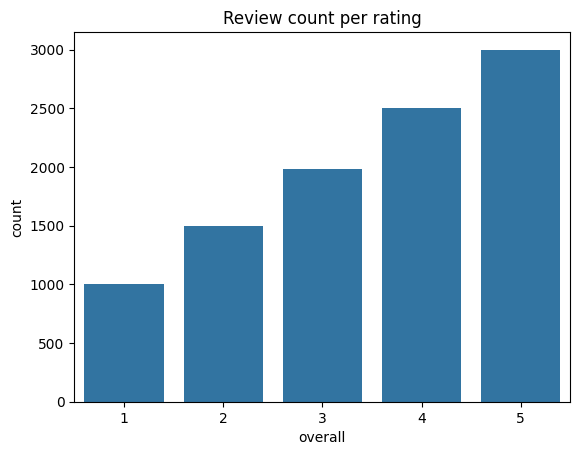

In [123]:
sns.countplot(x="overall", data=df_imbalanced)
plt.title("Review count per rating")
plt.show()

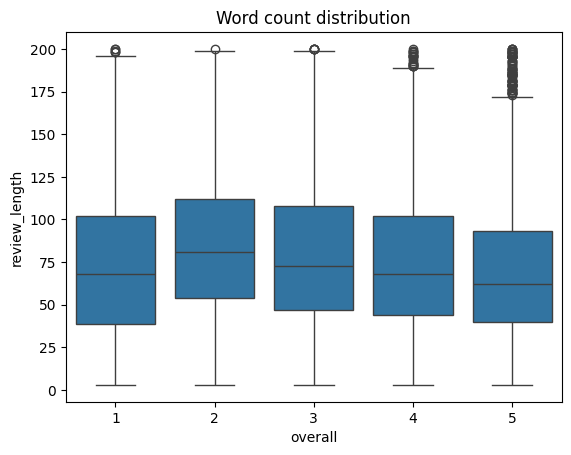

In [124]:
sns.boxplot(x="overall", y="review_length", data=df_imbalanced)
plt.title("Word count distribution")
plt.show()

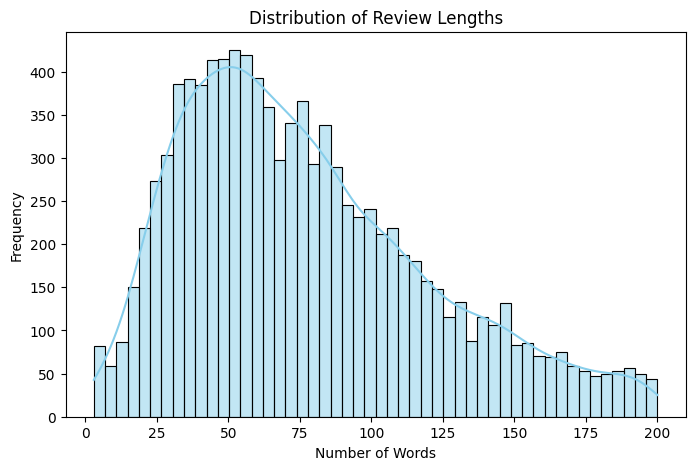

In [125]:
# 2. Review Length Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_imbalanced['review_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [126]:
for rating in sorted(df_imbalanced["overall"].unique()):
    print(f"\n⭐Rating {rating} Sample Reviews:")
    print(df_imbalanced[df_imbalanced["overall"] == rating]["reviews"].head(4).to_list())


⭐Rating 1 Sample Reviews:
['book hotel month arrived decribed building site picked jaw ground asked builder going directed reception hard hat supplied place dangerously derelict downstairs hotel manager seat bag cement manager explained refurbisments going reminded said thing phone previous day order went tell apartment available street away voiced utter dissappointment travelling seven month old baby adult tired took key apartment described follows flight stair elevator baby buggy fit tiny lift person walk flight buggy padlocked kitchen door electric faulty kitchen bound way feed baby management quite aggressive instance went complain given breakfast voucher little cafe beneath hotel stand breakfast sit table incurr charge managed muddle night purchased kettle make bottle reason booked hotel roof terrece invisenged wonderful evening sipping wine taking breath taking view beautiful city offer instead stuck ramshackle apartment described mediocre good day receieve night free way apolog

In [127]:
df_imbalanced

,overall,reviews,review_length
0,2,star lobby star hotel stayed start end europe ...,65
1,3,ok night understand people shout absolutely lo...,77
2,5,luxury valley wing stayed valley wing bedroome...,53
3,4,decent hotel great location friendly staff hot...,16
4,1,book hotel month arrived decribed building sit...,139
...,...,...,...
9982,4,great hotel location worried booking hotel rea...,58
9983,4,great place relax got night stay march check f...,110
9984,4,miramar excellent location miramar great locat...,62
9985,1,problem way stayed night property bad stayed r...,33


In [128]:
df_imbalanced = df_imbalanced.drop('review_length', axis=1)

In [129]:
df_imbalanced

,overall,reviews
0,2,star lobby star hotel stayed start end europe ...
1,3,ok night understand people shout absolutely lo...
2,5,luxury valley wing stayed valley wing bedroome...
3,4,decent hotel great location friendly staff hot...
4,1,book hotel month arrived decribed building sit...
...,...,...
9982,4,great hotel location worried booking hotel rea...
9983,4,great place relax got night stay march check f...
9984,4,miramar excellent location miramar great locat...
9985,1,problem way stayed night property bad stayed r...


In [130]:
#train test split¶

In [131]:
df_imbalanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9987 entries, 0 to 9986
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   overall  9987 non-null   int64 
 1   reviews  9987 non-null   object
dtypes: int64(1), object(1)
memory usage: 156.2+ KB


In [132]:
print(df_imbalanced['overall'].value_counts())

overall
5    3000
4    2500
3    1987
2    1500
1    1000
Name: count, dtype: int64


In [133]:
df_imbalanced=df_imbalanced.reset_index(drop=True)

In [153]:
from sklearn.model_selection import train_test_split

X = df_imbalanced['reviews']
y = df_imbalanced['overall']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       
    stratify=y,           
    random_state=42,
)

In [155]:
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print("\nClass distribution in train set:")
print(y_train.value_counts())
print("\nClass distribution in test set:")
print(y_test.value_counts())

Training samples: 7989
Testing samples: 1998

Class distribution in train set:
overall
5    2400
4    2000
3    1589
2    1200
1     800
Name: count, dtype: int64

Class distribution in test set:
overall
5    600
4    500
3    398
2    300
1    200
Name: count, dtype: int64


In [156]:
#vectorization¶

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=20000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Vectorized X_train shape:", X_train_vec.shape)
print("Vectorized X_test shape:", X_test_vec.shape)

Vectorized X_train shape: (7989, 20000)
Vectorized X_test shape: (1998, 20000)


In [139]:
#training

In [140]:
print(df_imbalanced['overall'].value_counts())

overall
5    3000
4    2500
3    1987
2    1500
1    1000
Name: count, dtype: int64


In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

In [142]:
#initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight='balanced',random_state=42)
}

In [143]:
#training and evaluation
results = {}

for name, model in models.items():
    print(f"\n Training {name}...")
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)

    acc = accuracy_score(y_test, preds)
    print(f"✅ Accuracy for {name}: {acc:.4f}")
    print(classification_report(y_test, preds))
    
    results[name] = (model, acc)


 Training Logistic Regression...
✅ Accuracy for Logistic Regression: 0.5591
              precision    recall  f1-score   support

           1       0.64      0.49      0.56       200
           2       0.46      0.42      0.44       300
           3       0.47      0.46      0.47       398
           4       0.52      0.51      0.52       500
           5       0.66      0.75      0.70       600

    accuracy                           0.56      1998
   macro avg       0.55      0.53      0.54      1998
weighted avg       0.56      0.56      0.56      1998


 Training Random Forest...
✅ Accuracy for Random Forest: 0.5035
              precision    recall  f1-score   support

           1       0.66      0.49      0.57       200
           2       0.57      0.27      0.37       300
           3       0.48      0.32      0.38       398
           4       0.43      0.36      0.39       500
           5       0.51      0.86      0.64       600

    accuracy                           0.50

In [147]:
best_model_name = max(results, key=lambda k: results[k][1])
best_model = results[best_model_name][0]

print(f"\n Best model: {best_model_name}")


 Best model: Logistic Regression


In [148]:
import joblib
joblib.dump(best_model, "model_A.pkl")
joblib.dump(vectorizer, "vectorizer_A.pkl")
print("Model A saved  ")

Model A saved  


In [149]:
joblib.dump((X_test, y_test), "imbalanced_test.pkl")
print("test data saved.")

test data saved.


# finetuning

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
lr = LogisticRegression(max_iter=1000)

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced']
}

# Grid Search
grid_search = GridSearchCV(lr, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_vec, y_train)

print("Best Params:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Evaluate on test
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test_vec)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Params: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}
Best CV Score: 0.5518838402803855
Test Accuracy: 0.5535535535535535
              precision    recall  f1-score   support

           1       0.54      0.67      0.60       200
           2       0.44      0.43      0.43       300
           3       0.46      0.46      0.46       398
           4       0.51      0.50      0.51       500
           5       0.72      0.69      0.70       600

    accuracy                           0.55      1998
   macro avg       0.53      0.55      0.54      1998
weighted avg       0.56      0.55      0.55      1998



In [162]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_lr = best_lr.predict(X_test_vec)
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

=== Logistic Regression ===
Accuracy: 0.5535535535535535
              precision    recall  f1-score   support

           1       0.54      0.67      0.60       200
           2       0.44      0.43      0.43       300
           3       0.46      0.46      0.46       398
           4       0.51      0.50      0.51       500
           5       0.72      0.69      0.70       600

    accuracy                           0.55      1998
   macro avg       0.53      0.55      0.54      1998
weighted avg       0.56      0.55      0.55      1998

[[133  53  10   1   3]
 [ 69 129  83  15   4]
 [ 25  76 183  84  30]
 [  5  27  96 250 122]
 [ 14  10  27 138 411]]


In [163]:
import joblib

# For balanced fine-tuned Logistic Regression
joblib.dump(best_lr, 'models/fine_tuned_logistic_balanced.pkl')

print("✅ Fine-tuned models saved ")

✅ Fine-tuned models saved 
